In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import datetime
from pyecharts import options as opts
from pyecharts.charts import Bar
import pyecharts.options as opts
from pyecharts.charts import Line
from pyecharts import options as opts
from pyecharts.charts import Pie
from pyecharts.commons.utils import JsCode

In [69]:
data = pd.read_csv("data.csv",sep=",")
data.columns

Index(['dateRep', 'day', 'month', 'year', 'cases', 'deaths',
       'countriesAndTerritories', 'geoId', 'countryterritoryCode',
       'popData2020', 'continentExp'],
      dtype='object')

In [72]:
data.countriesAndTerritories.unique()

array(['Austria', 'Belgium', 'Bulgaria', 'Croatia', 'Cyprus', 'Czechia',
       'Denmark', 'Estonia', 'Finland', 'France', 'Germany', 'Greece',
       'Hungary', 'Iceland', 'Ireland', 'Italy', 'Latvia',
       'Liechtenstein', 'Lithuania', 'Luxembourg', 'Malta', 'Netherlands',
       'Norway', 'Poland', 'Portugal', 'Romania', 'Slovakia', 'Slovenia',
       'Spain', 'Sweden'], dtype=object)

In [74]:
df = pd.read_csv("2021-12-17_deces_quotidiens_departement.csv",sep= ";",encoding='unicode_escape')
df.sample(10)

,Date_evenement,Zone,Communes_a_envoi_dematerialise_Deces2021,Total_deces_2021,Communes_a_envoi_dematerialise_Deces2020,Total_deces_2020,Communes_a_envoi_dematerialise_Deces2019,Total_deces_2019
13141,27-nov.,Dept_34,10643.0,11318.0,10337,10957,9908,10518
15868,10-mai,Dept_42,2925.0,3204.0,3079,3363,2910,3176
5264,20-mai,Dept_14,2837.0,3238.0,2707,3105,2800,3207
30589,30-juil.,Dept_82,1325.0,1572.0,1227,1478,1267,1519
26256,27-sept.,Dept_70,1291.0,1670.0,1290,1615,1190,1495
22010,20-févr.,Dept_59,3778.0,4033.0,3379,3578,3683,3928
18898,20-août,Dept_50,3306.0,3877.0,3042,3647,3047,3557
4637,02-sept.,Dept_12,2081.0,2307.0,2107,2281,2080,2281
6321,09-avr.,Dept_17,1972.0,2399.0,1897,2282,1893,2268
30103,01-avr.,Dept_81,1058.0,1314.0,827,1019,1030,1273


In [3]:
df_v = pd.read_csv("vacsi-v-dep-2022-01-14-19h09.csv",sep= ";")
df_v.sample(10)


C:\Users\DENG\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3057: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,dep,vaccin,jour,n_dose1,n_dose2,n_dose3,n_dose4,n_rappel,n_cum_dose1,n_cum_dose2,n_cum_dose3,n_cum_dose4,n_cum_rappel
88274,57,3,2021-06-29,7,435,1,0,0,55071,35218,7,0,0
40205,28,1,2022-01-04,119,393,2435,6,2675,262206,253122,119041,268,126839
32963,23,3,2021-01-21,0,0,0,0,0,0,0,0,0,0
59234,38,3,2021-09-05,0,1,0,0,0,90237,67081,63,0,6
145937,95,2,2021-01-10,0,0,0,0,0,0,0,0,0,0
11580,08,3,2021-03-27,452,0,0,0,0,11164,1,0,0,0
96038,62,3,2021-10-11,0,2,0,0,0,127119,101708,194,0,37
105654,68,4,2021-11-21,0,0,0,0,0,10971,38,7,0,17
5115,04,2,2021-05-12,17,0,0,0,0,289,69,0,0,0
158948,31,0,2020-12-30,0,0,0,0,0,2,0,0,0,0


In [39]:
df_v_6 = df_v[df_v["dep"] == "06"]
df_v_6['jour'] = pd.to_datetime(df_v_6['jour'])
df_v_6.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1915 entries, 7660 to 149369
Data columns (total 13 columns):
dep             1915 non-null object
vaccin          1915 non-null int64
jour            1915 non-null datetime64[ns]
n_dose1         1915 non-null int64
n_dose2         1915 non-null int64
n_dose3         1915 non-null int64
n_dose4         1915 non-null int64
n_rappel        1915 non-null int64
n_cum_dose1     1915 non-null int64
n_cum_dose2     1915 non-null int64
n_cum_dose3     1915 non-null int64
n_cum_dose4     1915 non-null int64
n_cum_rappel    1915 non-null int64
dtypes: datetime64[ns](1), int64(11), object(1)
memory usage: 209.5+ KB


C:\Users\DENG\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [40]:
df_v_6= df_v_6.groupby(by="jour").sum().reset_index()
df_v_6.sample(10)

,jour,vaccin,n_dose1,n_dose2,n_dose3,n_dose4,n_rappel,n_cum_dose1,n_cum_dose2,n_cum_dose3,n_cum_dose4,n_cum_rappel
172,2021-06-17,10,6156,11708,32,0,0,1060860,637782,2630,0,0
137,2021-05-13,10,13926,2954,20,0,0,802402,368432,1156,0,0
124,2021-04-30,10,11810,8598,22,0,0,690618,296062,912,0,0
361,2021-12-23,10,1200,2972,10666,46,12640,1661296,1492326,726660,1768,785494
31,2021-01-27,10,4926,182,0,0,0,70036,296,0,0,0
79,2021-03-16,10,7182,1922,0,0,0,299042,76764,0,0,0
82,2021-03-19,10,12908,3504,0,0,0,333428,86968,2,0,0
4,2020-12-31,10,46,0,0,0,0,70,0,0,0,0
236,2021-08-20,10,5566,9924,112,0,0,1484232,1131682,4734,2,2
272,2021-09-25,10,804,2920,602,0,604,1578118,1311662,50520,24,45170


In [41]:
df_v_6.vaccin.unique()

array([10], dtype=int64)

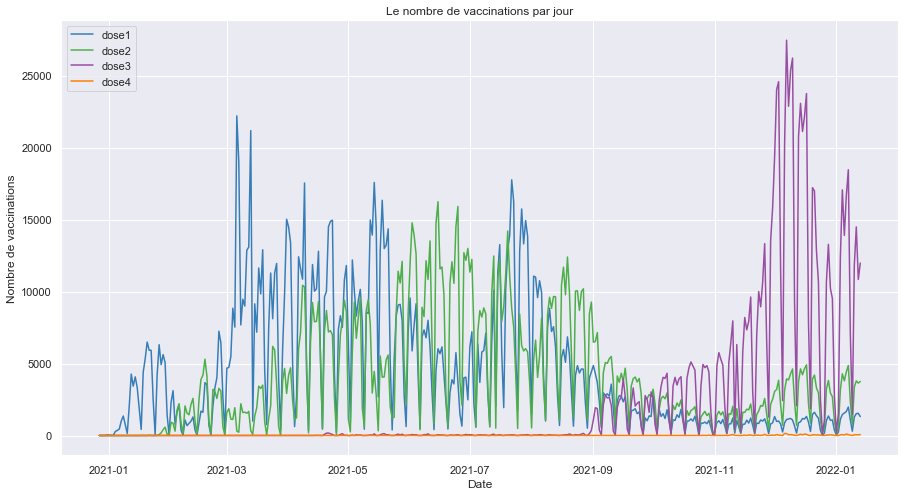

In [48]:
sns.set(style="darkgrid")
plt.figure(figsize =(15, 8))
palette = plt.get_cmap('Set1')

# Définition du premier graphique
### DeuxGraphes = plt.subplot(1 , 2 , 1) 
sns.lineplot(df_v_6['jour'],df_v_6['n_dose1'], label='dose1',color= palette(1))
sns.lineplot(df_v_6['jour'],df_v_6['n_dose2'], label='dose2',color=palette(2))
sns.lineplot(df_v_6['jour'],df_v_6['n_dose3'], label='dose3',color=palette(3))
sns.lineplot(df_v_6['jour'],df_v_6['n_dose4'], label='dose4',color=palette(4))
plt.xlabel('Date')
plt.ylabel('Nombre de vaccinations')
plt.title("Le nombre de vaccinations par jour") 
plt.legend(loc='upper left' )

# Définition du second graphique
### DeuxGraphes = plt.subplot(1, 2, 2) ##
plt.show()

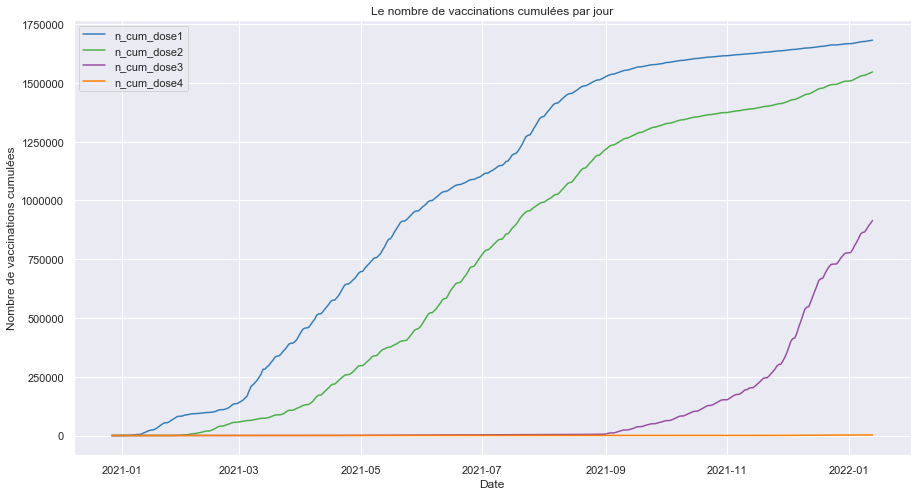

In [59]:
sns.set(style="darkgrid")
plt.figure(figsize =(15, 8))
palette = plt.get_cmap('Set1')
import scipy.stats as stats

# Définition du premier graphique
### DeuxGraphes = plt.subplot(1 , 2 , 1) 
sns.lineplot(df_v_6['jour'],df_v_6['n_cum_dose1'], label='n_cum_dose1',color= palette(1))
sns.lineplot(df_v_6['jour'],df_v_6['n_cum_dose2'], label='n_cum_dose2',color=palette(2))
sns.lineplot(df_v_6['jour'],df_v_6['n_cum_dose3'], label='n_cum_dose3',color=palette(3))
sns.lineplot(df_v_6['jour'],df_v_6['n_cum_dose4'], label='n_cum_dose4',color=palette(4))

plt.xlabel('Date')
plt.ylabel('Nombre de vaccinations cumulées')
plt.title("Le nombre de vaccinations cumulées par jour") 
plt.legend(loc='upper left' )

# Définition du second graphique
### DeuxGraphes = plt.subplot(1, 2, 2) ##
plt.show()

In [67]:
df_tot_s = pd.read_csv("donnees-hospitalieres-etablissements-covid19-2022-01-16-19h05.csv",sep= ";")
df_tot_s.sample(10)

,dep,jour,nb
59309,47,2021-10-20,5
64645,79,2021-12-11,9
27797,53,2020-12-15,10
25566,66,2020-11-23,14
31043,35,2021-01-16,25
12540,971,2020-07-18,5
38426,74,2021-03-29,24
21051,39,2020-10-10,8
32282,50,2021-01-28,15
812,973,2020-03-25,0


In [91]:
df_tot_s = pd.read_csv("donnees-hospitalieres-etablissements-covid19-2022-01-16-19h05.csv",sep= ";")

In [21]:
b = (
    Line()
    .add_xaxis(list(df_v_6['jour']))
    .add_yaxis(
        "2021",
        list(df_v_6['n_dose1']),
        is_symbol_show=False,
         is_smooth=True,
        markline_opts=opts.MarkLineOpts(data=[opts.MarkLineItem(type_="average")]),
    )
        .add_yaxis(
        "C2021",
        list(df_v_6['n_dose2']),
        is_symbol_show=False,
         is_smooth=True,
        markline_opts=opts.MarkLineOpts(data=[opts.MarkLineItem(type_="average")]),
    )

    .set_series_opts(
        ###### areastyle_opts=opts.AreaStyleOpts(opacity=0.5),
        label_opts=opts.LabelOpts(is_show=False),
        
    )
    .set_global_opts(title_opts=opts.TitleOpts(title="Salaire mensuel moyen des différents départements change avec l'âge" ,pos_top =0 ),
    legend_opts=opts.LegendOpts(pos_top="5%"),
    )
)

b.render_notebook()

In [ ]:
df_tot_s = pd.read_csv("donnees-hospitalieres-etablissements-covid19-2022-01-16-19h05.csv",sep= ";")
df_tot_s.sample(10)

In [81]:
def change_date(date):
    date = date.split("-")
    day = str(date[0])
    mois = date[1]
    m = 0
    if mois == "janv.":
        m = "01"
    elif mois == "févr.":
        m = "02"
    elif mois == "mars":
        m = "03"
    elif mois == "avr.":
        m = "04"
    elif mois == "mai":
        m ="05"
    elif mois == "juin":
        m = "06"
    elif mois == "juil.":
        m = "07"
    elif mois == "août":
        m ="08"
    elif mois == "sept.":
        m = "09"
    elif mois == "oct.":
        m = "10"
    elif mois == "nov.":
        m = "11"
    elif mois == "déc.":
        m = "12"

    if m !=  0 :
        ## lis = "2021" + str(m) + str(day)
        lis =  str(day) +"/" + str(m)
    else:
        lis = "False"
    return lis

def make_month(mon):
    mon = mon.split("-")
    mois = mon[1]
    m = 0
    if mois == "janv.":
        m = "01"
    elif mois == "févr.":
        m = "02"
    elif mois == "mars":
        m = "03"
    elif mois == "avr.":
        m = "04"
    elif mois == "mai":
        m ="05"
    elif mois == "juin":
        m = "06"
    elif mois == "juil.":
        m = "07"
    elif mois == "août":
        m ="08"
    elif mois == "sept.":
        m = "09"
    elif mois == "oct.":
        m = "10"
    elif mois == "nov.":
        m = "11"
    elif mois == "déc.":
        m = "12"
    if m == 0:
        m = "F"
    return m

df["Date"] = df["Date_evenement"].apply(change_date)
df["Month"] = df["Date_evenement"].apply(make_month)
df["Month"][:10]

0    01
1    01
2    01
3    01
4    01
5    01
6    01
7    01
8    01
9    01
Name: Month, dtype: object

In [24]:
df.iloc[14853,]

Date_evenement                              01-août
Zone                                        Dept_39
Communes_a_envoi_dematerialise_Deces2021     1311.0
Total_deces_2021                             1622.0
Communes_a_envoi_dematerialise_Deces2020       1321
Total_deces_2020                               1612
Communes_a_envoi_dematerialise_Deces2019       1234
Total_deces_2019                               1512
Date                                          01/08
Month                                            08
Name: 14853, dtype: object

In [76]:
df['Date'] = pd.to_datetime(df['Date'], format='%Y%m%d', errors='coerce')

In [26]:
df.columns

Index(['Date_evenement', 'Zone', 'Communes_a_envoi_dematerialise_Deces2021',
       'Total_deces_2021', 'Communes_a_envoi_dematerialise_Deces2020',
       'Total_deces_2020', 'Communes_a_envoi_dematerialise_Deces2019',
       'Total_deces_2019', 'Date', 'Month'],
      dtype='object')

In [82]:
df_6 = df[df["Zone"] == 'Dept_06']

In [80]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37332 entries, 0 to 37331
Data columns (total 10 columns):
Date_evenement                              37332 non-null object
Zone                                        37332 non-null object
Communes_a_envoi_dematerialise_Deces2021    35190 non-null float64
Total_deces_2021                            34782 non-null float64
Communes_a_envoi_dematerialise_Deces2020    37332 non-null int64
Total_deces_2020                            37332 non-null int64
Communes_a_envoi_dematerialise_Deces2019    37332 non-null int64
Total_deces_2019                            37332 non-null int64
Date                                        0 non-null datetime64[ns]
Month                                       37332 non-null object
dtypes: datetime64[ns](1), float64(2), int64(4), object(3)
memory usage: 2.8+ MB


In [78]:
df.describe()

,Communes_a_envoi_dematerialise_Deces2021,Total_deces_2021,Communes_a_envoi_dematerialise_Deces2020,Total_deces_2020,Communes_a_envoi_dematerialise_Deces2019,Total_deces_2019
count,35190.000000,34782.000000,37332.000000,37332.000000,37332.000000,37332.000000
mean,5688.228417,6189.873785,5938.921194,6521.006322,5624.046930,6156.033323
std,32374.801852,35211.344132,34128.141071,37473.313543,32100.242694,35123.901600
min,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000
25%,924.000000,1073.250000,906.000000,1063.000000,929.000000,1078.000000
50%,2005.000000,2283.000000,2039.500000,2347.000000,2018.000000,2292.000000
75%,4004.000000,4331.000000,4184.000000,4621.250000,3920.250000,4307.000000
max,558469.000000,606573.000000,608731.000000,669170.000000,560343.000000,613456.000000


In [84]:
a = (
    Line()
    .add_xaxis(list(df_6["Date"]))
    .add_yaxis(
        "2021",
        list(df_6["Total_deces_2021"]),
        is_symbol_show=False,
        markline_opts=opts.MarkLineOpts(data=[opts.MarkLineItem(type_="average")]),
    )
        .add_yaxis(
        "2020",
        list(df_6["Total_deces_2020"]),
        is_symbol_show=False,
        markline_opts=opts.MarkLineOpts(data=[opts.MarkLineItem(type_="average")]),
    )
    .add_yaxis(
        "2019",
        list(df_6["Total_deces_2019"]),
        is_symbol_show=False,
        markline_opts=opts.MarkLineOpts(data=[opts.MarkLineItem(type_="average")]),
    )
    .set_series_opts(
        areastyle_opts=opts.AreaStyleOpts(opacity=0.4),
        label_opts=opts.LabelOpts(is_show=False),
        
    )
    .set_global_opts(title_opts=opts.TitleOpts(title="Nombre de décè cumulé par jour" ,pos_top =0 ),
    legend_opts=opts.LegendOpts(pos_top="5%"),
    )
)

a.render_notebook()

In [126]:
b = (
    Line()
    .add_xaxis(list(df_6["Date"]))
    .add_yaxis(
        "2021",
        list(df_6["Total_deces_2021"]),
        markline_opts=opts.MarkLineOpts(data=[opts.MarkLineItem(type_="average")]),
    )
        .add_yaxis(
        "2020",
        list(df_6["Total_deces_2020"]),
        markline_opts=opts.MarkLineOpts(data=[opts.MarkLineItem(type_="average")]),
    )
    .add_yaxis(
        "2019",
        list(df_6["Total_deces_2019"]),
        markline_opts=opts.MarkLineOpts(data=[opts.MarkLineItem(type_="average")]),
    )
    .set_series_opts(
        ### areastyle_opts=opts.AreaStyleOpts(opacity=0.5),
        label_opts=opts.LabelOpts(is_show=False),
    )
    .set_global_opts(title_opts=opts.TitleOpts(title="Salaire mensuel moyen des différents départements change avec l'âge" ,pos_top =0 ),
    legend_opts=opts.LegendOpts(pos_top="5%"),)
)

b.render_notebook()

In [123]:
Zone = df.groupby(by = "Zone").max().reset_index()
Zone = Zone[Zone["Zone"]!= "France"]

In [21]:
z = (
    Line()
    .add_xaxis(list(Zone["Zone"]))
    .add_yaxis(
        "2021",
        list(Zone["Total_deces_2021"]),
        markpoint_opts=opts.MarkPointOpts(
            data=[
                opts.MarkPointItem(type_="max", name="最大值"),
                opts.MarkPointItem(type_="min", name="最小值"),
            ]
        ),
        
    )
    .add_yaxis(
        "2020",
        list(Zone["Total_deces_2020"]),
        
    )
    .add_yaxis(
        "2019",
        list(Zone["Total_deces_2019"]),
    
    )
    .set_series_opts(
        ### areastyle_opts=opts.AreaStyleOpts(opacity=0.5),
        label_opts=opts.LabelOpts(is_show=False),
    )
    .set_global_opts(title_opts=opts.TitleOpts(title="Salaire mensuel moyen des différents départements change avec l'âge" ,pos_top =0 ),
    legend_opts=opts.LegendOpts(pos_top="5%"),)
)

z.render_notebook()

NameError: name 'Zone' is not defined

In [129]:
df_patho = pd.read_csv("donnees-vaccination-par-pathologie.csv",sep= ";",encoding='unicode_escape')
df_patho.sample(10)

,date_reference,regroupement_pathologie,pathologie,region_residence,libelle_region,departement_residence,libelle_departement,population_ref_cartographie,population_patho_cartographie,effectif_1_inj_pathologie,effectif_termine_pathologie,taux_1_inj_pathologie,taux_termine_pathologie,ordre
4967,2021-12-12,Pathologies psychiatriques et neurologiques,DÃ©mences (dont maladie d'Alzheimer),76,Occitanie,12,Aveyron,227200,3200.0,2880.0,2860.0,0.900,0.892,29.0
1010,2021-12-12,Autres catÃ©gories de pathologies,Transplantation rÃ©nale,76,Occitanie,66,PyrÃ©nÃ©es-Orientales,410770,280.0,240.0,240.0,0.878,0.874,50.0
5767,2021-12-12,Pathologies psychiatriques et neurologiques,Retard mental,04,RÃ©union,Tout dÃ©partement,FRANCE,674330,1290.0,900.0,880.0,0.696,0.679,34.0
2256,2021-12-12,Cancers sous surveillance,Cancer du sein de la femme sous surveillance,84,Auvergne-RhÃ´ne-Alpes,15,Cantal,117470,1340.0,1260.0,1250.0,0.940,0.934,9.0
5975,2021-12-12,Pathologies psychiatriques et neurologiques,Tabagisme,11,Ile-de-France,75,Paris,1805910,58570.0,52750.0,52230.0,0.901,0.892,36.0
1682,2021-12-12,Cancers actifs,Toutes pathologies de la catÃ©gorie,76,Occitanie,30,Gard,624710,14380.0,12880.0,12760.0,0.895,0.888,NaN
3028,2021-12-12,Maladies inflammatoires et de la peau,Toutes pathologies de la catÃ©gorie,11,Ile-de-France,78,Yvelines,1145890,18080.0,16020.0,15890.0,0.886,0.879,NaN
170,2021-12-12,Autres catÃ©gories de pathologies,Dialyse chronique,44,Grand Est,52,Haute-Marne,136790,140.0,130.0,130.0,0.970,0.970,43.0
3966,2021-12-12,Pathologies cardiomÃ©taboliques,Insuffisance cardiaque,52,Pays de la Loire,72,Sarthe,445890,5670.0,5050.0,4990.0,0.891,0.880,14.0
4443,2021-12-12,Pathologies cardiomÃ©taboliques,ObÃ©sitÃ© (sÃ©jour hospitalier),11,Ile-de-France,77,Seine-et-Marne,1095930,19200.0,16810.0,16610.0,0.875,0.865,18.0


In [85]:
df_open = pd.read_csv("table-indicateurs-open-data-dep-2022-01-16-19h09.csv",sep=",")
df_open.sample(5)

C:\Users\DENG\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3057: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,dep,date,reg,lib_dep,lib_reg,tx_pos,tx_incid,TO,R,hosp,...,dchosp,reg_rea,incid_hosp,incid_rea,incid_rad,incid_dchosp,reg_incid_rea,pos,pos_7j,cv_dose1
51707,77,2020-07-13,11,Seine-et-Marne,Île-de-France,0.568426,3.722938,0.204882,NaN,209,...,694,235,1.0,0.0,5.0,5.0,2.0,9.0,53.0,NaN
64643,971,2021-02-04,1,Guadeloupe,Guadeloupe,3.340813,35.555178,0.148148,NaN,50,...,171,4,0.0,0.0,0.0,0.0,0.0,26.0,134.0,NaN
5700,09,2021-02-21,76,Ariège,Occitanie,3.181029,108.269137,0.586498,NaN,67,...,52,278,0.0,0.0,0.0,0.0,8.0,1.0,165.0,NaN
56560,84,2020-12-23,93,Vaucluse,Provence-Alpes-Côte d'Azur,4.427245,203.922659,0.623913,NaN,310,...,417,287,15.0,4.0,15.0,4.0,21.0,213.0,1144.0,NaN
13878,22,2021-07-09,53,Côtes-d'Armor,Bretagne,1.194108,22.979406,0.123457,NaN,20,...,248,20,1.0,0.0,0.0,0.0,2.0,32.0,137.0,NaN


In [133]:
df_open.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 67064 entries, 0 to 67063
Data columns (total 22 columns):
dep              67064 non-null object
date             67064 non-null object
reg              67064 non-null int64
lib_dep          67064 non-null object
lib_reg          67064 non-null object
tx_pos           60499 non-null float64
tx_incid         60499 non-null float64
TO               67064 non-null float64
R                10298 non-null float64
hosp             67064 non-null int64
rea              67064 non-null int64
rad              67064 non-null int64
dchosp           67064 non-null int64
reg_rea          67064 non-null int64
incid_hosp       66963 non-null float64
incid_rea        66963 non-null float64
incid_rad        66963 non-null float64
incid_dchosp     66963 non-null float64
reg_incid_rea    66963 non-null float64
pos              61105 non-null float64
pos_7j           60499 non-null float64
cv_dose1         96 non-null float64
dtypes: float64(12), int64(6),

In [155]:
df_alldep = df_open.groupby(by=["lib_reg","dep"]).sum().reset_index().sort_values(by="incid_hosp",ascending=False)
df_alldep[df_alldep.lib_reg == "Provence-Alpes-Côte d'Azur"]

,lib_reg,dep,reg,tx_pos,tx_incid,TO,R,hosp,rea,rad,dchosp,reg_rea,incid_hosp,incid_rea,incid_rad,incid_dchosp,reg_incid_rea,pos,pos_7j,cv_dose1
92,Provence-Alpes-Côte d'Azur,13,62310,3060.356843,190000.732378,388.404348,113.66,561202,108919,9343939,1533296,178656,37022.0,6801.0,30517.0,4665.0,12386.0,581764.0,3865506.0,71.8
91,Provence-Alpes-Côte d'Azur,06,62310,2952.471501,171107.360042,388.404348,113.66,200829,30936,2692170,619905,178656,11506.0,2668.0,8763.0,1957.0,12386.0,280639.0,1846926.0,77.9
87,Provence-Alpes-Côte d'Azur,83,62310,2846.696011,148974.703772,388.404348,113.66,163331,23485,2553059,577526,178656,11080.0,1705.0,8401.0,1932.0,12386.0,242154.0,1599744.0,77.0
88,Provence-Alpes-Côte d'Azur,84,62310,3544.997017,146813.262816,388.404348,113.66,105801,8530,1608109,354033,178656,7560.0,727.0,5634.0,1139.0,12386.0,124249.0,823618.0,74.5
90,Provence-Alpes-Côte d'Azur,05,62310,3539.948346,140719.969525,388.404348,113.66,38784,4130,504821,102756,178656,2137.0,315.0,1656.0,303.0,12386.0,30752.0,199479.0,76.0
89,Provence-Alpes-Côte d'Azur,04,62310,2962.089502,131407.955350,388.404348,113.66,43521,2656,468112,96470,178656,2091.0,170.0,1480.0,308.0,12386.0,32703.0,217082.0,70.8


In [ ]:
age_level = df.groupby(["age_cut","y"])["balance"].count().reset_index()
age_level = age_level.set_index(['age_cut',"y"])  
age_level['%'] = round(100 * (age_level / age_level.groupby('age_cut').sum()),2)
age_level = age_level.reset_index()

In [177]:
df_open_6 = df_open[df_open.dep == "06"]
df_open_6.date = pd.to_datetime(df_open_6.date)

C:\Users\DENG\Anaconda3\lib\site-packages\pandas\core\generic.py:5096: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[name] = value


In [182]:
## df_open_6.sort_values(by = "tx_pos", ascending=False)
df_open_6

Timestamp('2022-01-13 00:00:00')

Text(2022-01-13 00:00:00, 20.3600962436928, '\\leftarrow sin(\\pi)')

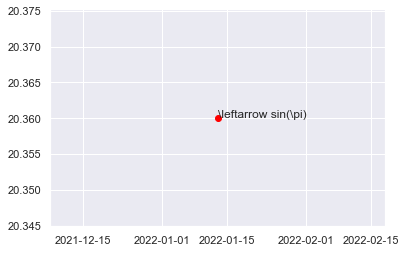

In [191]:
plt.scatter(df_open_6.loc[4016,"date"],df_open_6.loc[4016,"tx_pos"],color= "red")
plt.text(df_open_6.loc[4016,"date"],df_open_6.loc[4016,"tx_pos"],str(df_open_6.loc[4016,"tx_pos"]))


In [216]:

low = datetime.datetime.strptime('20210101', '%Y%m%d').date()
high = datetime.datetime.strptime('20210228', '%Y%m%d').date()
target = df_open_6[(df_open_6.date > low) & (df_open_6.date < high)]
target.sort_values(by="tx_pos",ascending=False)[:1]

C:\Users\DENG\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: FutureWarning: Comparing Series of datetimes with 'datetime.date'.  Currently, the
'datetime.date' is coerced to a datetime. In the future pandas will
not coerce, and a TypeError will be raised. To retain the current
behavior, convert the 'datetime.date' to a datetime with
'pd.Timestamp'.
  This is separate from the ipykernel package so we can avoid doing imports until


,dep,date,reg,lib_dep,lib_reg,tx_pos,tx_incid,TO,R,hosp,...,dchosp,reg_rea,incid_hosp,incid_rea,incid_rad,incid_dchosp,reg_incid_rea,pos,pos_7j,cv_dose1
3649,06,2021-01-11,93,Alpes-Maritimes,Provence-Alpes-Côte d'Azur,9.119035,436.911013,0.680435,NaN,587,...,671,313,34.0,9.0,19.0,12.0,30.0,1088.0,4716.0,NaN


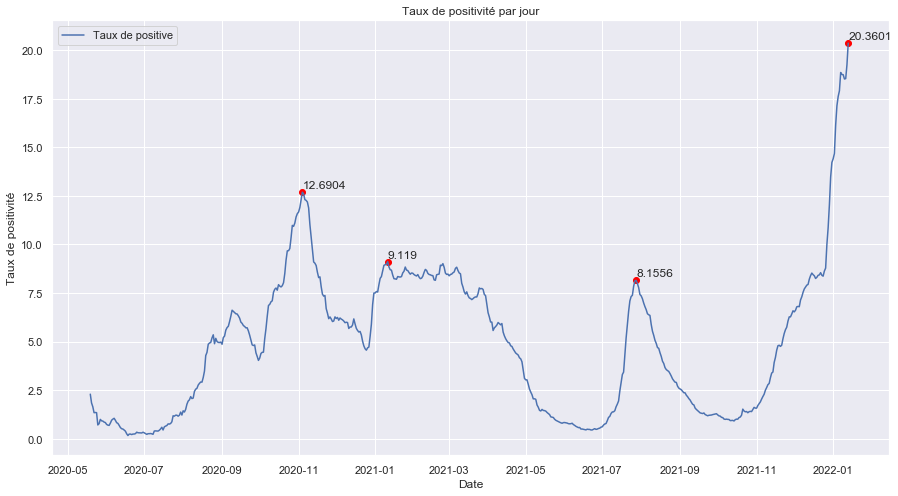

In [218]:
sns.set(style="darkgrid")
plt.figure(figsize =(15, 8))

sns.lineplot(df_open_6.date, df_open_6.tx_pos,label ="Taux de positive")
plt.scatter(df_open_6.loc[4016,"date"],df_open_6.loc[4016,"tx_pos"],color= "red")
plt.text(df_open_6.loc[4016,"date"],df_open_6.loc[4016,"tx_pos"]+0.2,str(round(df_open_6.loc[4016,"tx_pos"],4)))

plt.scatter(df_open_6.loc[3847,"date"],df_open_6.loc[3847,"tx_pos"],color= "red")
plt.text(df_open_6.loc[3847,"date"],df_open_6.loc[3847,"tx_pos"]+0.2,str(round(df_open_6.loc[3847,"tx_pos"],4)))

plt.scatter(df_open_6.loc[3581,"date"],df_open_6.loc[3581,"tx_pos"],color= "red")
plt.text(df_open_6.loc[3581,"date"],df_open_6.loc[3581,"tx_pos"]+0.2,str(round(df_open_6.loc[3581,"tx_pos"],4)))

plt.scatter(df_open_6.loc[3649,"date"],df_open_6.loc[3649,"tx_pos"],color= "red")
plt.text(df_open_6.loc[3649,"date"],df_open_6.loc[3649,"tx_pos"]+0.2,str(round(df_open_6.loc[3649,"tx_pos"],4)))
### sns.lineplot(df_open_6.date, df_open_6.tx_incid,label = "Taux d'occupation")
##sns.lineplot(df_open_6.date, df_open_6["TO"],label = "Taux d'occupation",linewidth=2,marker="o")

plt.xlabel('Date')
plt.ylabel('Taux de positivité')
plt.title("Taux de positivité par jour") 
plt.legend(loc='upper left' )
plt.show()

In [111]:
df_open_6["dece_hsp"] = df_open_6.incid_dchosp*100 / df_open_6.incid_hosp

C:\Users\DENG\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [ ]:
sns.set(style="darkgrid")
plt.figure(figsize =(15, 8))

## sns.lineplot(df_open_6.date, df_open_6.dchosp)
sns.lineplot(df_open_6.date, df_open_6.incid_dchosp,label ="nouveaux décésé 24h")
sns.lineplot(df_open_6.date, df_open_6.incid_hosp,label = "nouveaux patient 24h")
sns.lineplot(df_open_6.date, df_open_6["TO"],label = "Taux d'occupation",linewidth=2,marker="o")
##sns.lineplot(df_open_6.date, df_open_6.incid_rea )
##sns.lineplot(df_open_6.date, df_open_6.incid_rad )
plt.xlabel('Date')
plt.ylabel('Nombre de hospitalisation')
plt.title("Le nombre de hospitalisation par jour") 
plt.legend(loc='upper left' )
plt.show()

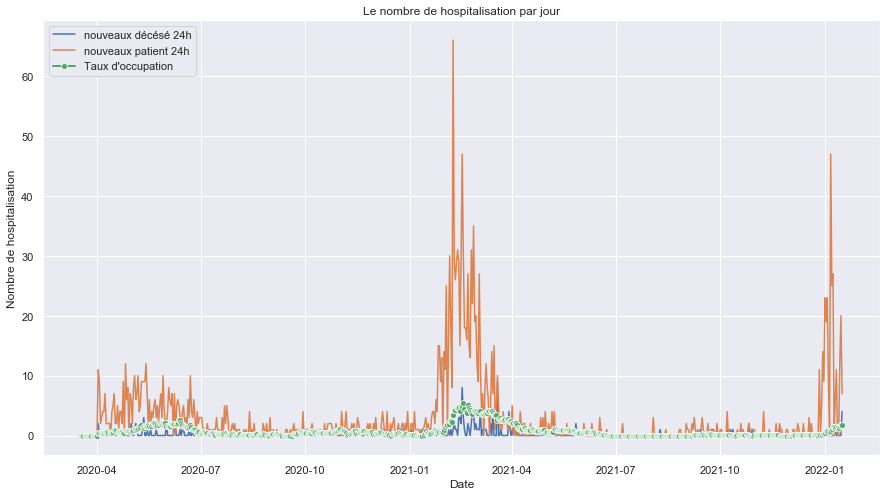

In [118]:
sns.set(style="darkgrid")
plt.figure(figsize =(15, 8))

## sns.lineplot(df_open_6.date, df_open_6.dchosp)
sns.lineplot(df_open_6.date, df_open_6.incid_dchosp,label ="nouveaux décésé 24h")
sns.lineplot(df_open_6.date, df_open_6.incid_hosp,label = "nouveaux patient 24h")
sns.lineplot(df_open_6.date, df_open_6["TO"],label = "Taux d'occupation",linewidth=2,marker="o")
##sns.lineplot(df_open_6.date, df_open_6.incid_rea )
##sns.lineplot(df_open_6.date, df_open_6.incid_rad )
plt.xlabel('Date')
plt.ylabel('Nombre de hospitalisation')
plt.title("Le nombre de hospitalisation par jour") 
plt.legend(loc='upper left' )
plt.show()

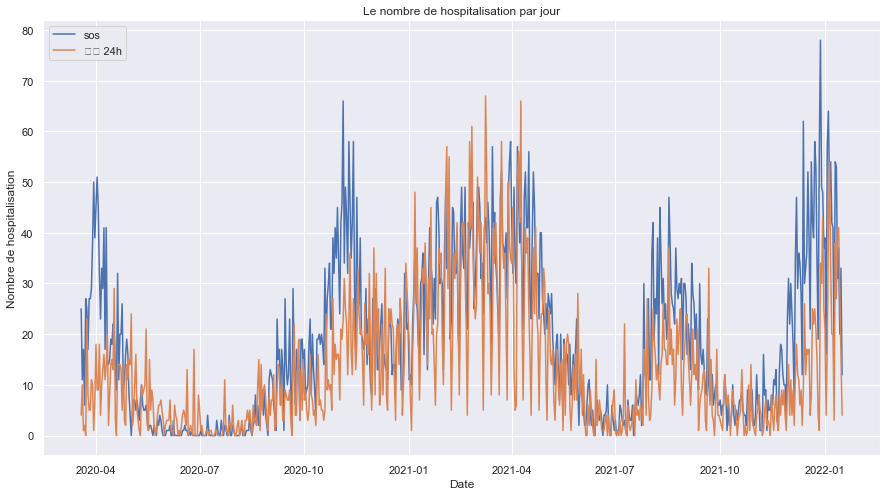

In [225]:
sns.set(style="darkgrid")
plt.figure(figsize =(15, 8))

## sns.lineplot(df_open_6.date, df_open_6.dchosp)
####sns.lineplot(df_open_6.date, df_open_6.dchosp,label ="nouveaux décésé 24h")
##sns.lineplot(df_open_6.date, df_open_6.incid_hosp,label = "patient hosp 24h")
sns.lineplot(df_open_6.date, df_open_6.reg_incid_rea,label = "sos")
sns.lineplot(df_open_6.date, df_open_6.incid_rad,label = "回家 24h")
### linewidth=2,marker="o"
##sns.lineplot(df_open_6.date, df_open_6.incid_rea )
##sns.lineplot(df_open_6.date, df_open_6.incid_rad )
plt.xlabel('Date')
plt.ylabel('Nombre de hospitalisation')
plt.title("Le nombre de hospitalisation par jour") 
plt.legend(loc='upper left' )
plt.show()

In [116]:
df_sex = pd.read_csv("covid-cedc-sex-quot.csv",sep=";")
df_sex.sample(10)
df_sex.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22776 entries, 0 to 22775
Data columns (total 4 columns):
dep                  22776 non-null object
sexe                 22776 non-null int64
Dc_Elec_Covid_cum    22776 non-null int64
jour                 22776 non-null object
dtypes: int64(2), object(2)
memory usage: 711.8+ KB


In [119]:
df_sex.jour = pd.to_datetime(df_sex.jour)

In [133]:
df_sex_6 = df_sex[df_sex["dep"] == "06"]
df_sex_6.groupby(by="sexe").sum()

,Dc_Elec_Covid_cum
sexe,
0,5281
1,3236
2,2045


In [134]:
df_jour = df_sex_6.groupby(by=["jour","sexe"]).sum().reset_index()
sex_0 = df_jour[df_jour.sexe == 0]["Dc_Elec_Covid_cum"]
sex_1 = df_jour[df_jour.sexe == 1]["Dc_Elec_Covid_cum"]
sex_2 = df_jour[df_jour.sexe == 2]["Dc_Elec_Covid_cum"]

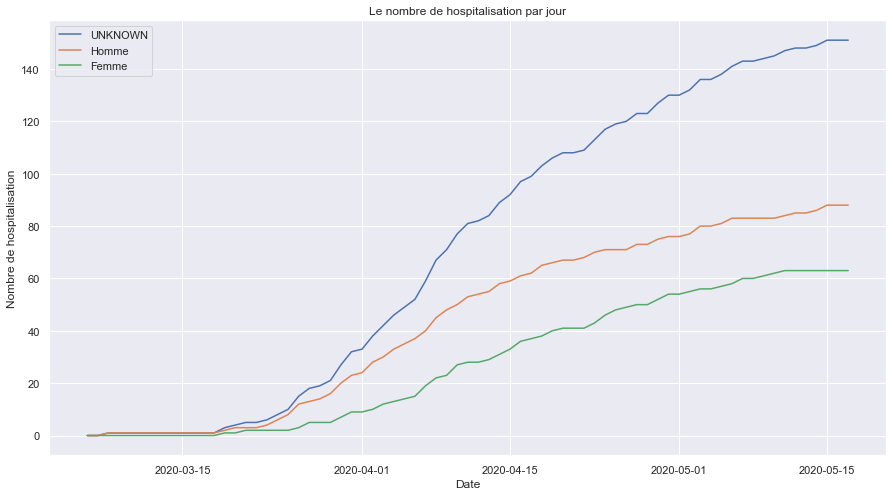

In [143]:
plt.figure(figsize =(15, 8))
sns.lineplot(list(df_jour[df_jour.sexe == 0]["jour"]) , list(sex_0),label = "UNKNOWN")
sns.lineplot(list(df_jour[df_jour.sexe == 1]["jour"]) , list(sex_1),label = "Homme")
sns.lineplot(list(df_jour[df_jour.sexe == 2]["jour"]) , list(sex_2),label = "Femme")
plt.xlabel('Date')
plt.ylabel('Nombre quotidien cumulé de décès')
plt.title("Le Nombre quotidien cumulé de décès") 
plt.legend(loc='upper left' )
plt.show()

In [8]:
df_vac = pd.read_csv("vacsi12-dep-2022-01-10-19h09.csv",sep=";")
df_vac.sample(5)

,dep,jour,n_dose1,n_complet,n_rappel,n_cum_dose1,n_cum_complet,n_cum_rappel,couv_dose1,couv_complet,couv_rappel
25722,67,2021-11-21,33,82,232,869365,854684,86782,88.4,86.9,8.8
11657,30,2021-10-10,11,28,12,544074,526862,18950,83.8,81.1,2.9
26314,69,2021-06-08,14554,8024,0,767767,376481,0,48.2,23.6,0.0
12020,31,2021-09-24,803,1980,988,1015427,978275,15816,84.3,81.2,1.3
9802,27,2021-11-19,229,274,2212,462561,455058,48810,90.5,89.1,9.6


In [15]:
df_vac_06 = df_vac[df_vac["dep"]== '06']
df_vac_06.head()

,dep,jour,n_dose1,n_complet,n_rappel,n_cum_dose1,n_cum_complet,n_cum_rappel,couv_dose1,couv_complet,couv_rappel
1895,06,2020-12-27,5,0,0,5,0,0,0.0,0.0,0.0
1896,06,2020-12-28,4,0,0,9,0,0,0.0,0.0,0.0
1897,06,2020-12-29,0,0,0,9,0,0,0.0,0.0,0.0
1898,06,2020-12-30,3,0,0,12,0,0,0.0,0.0,0.0
1899,06,2020-12-31,23,0,0,35,0,0,0.0,0.0,0.0


In [18]:
df_vac_06.jour = pd.to_datetime(df_vac_06.jour)

C:\Users\10142260\Anaconda3\lib\site-packages\pandas\core\generic.py:5516: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


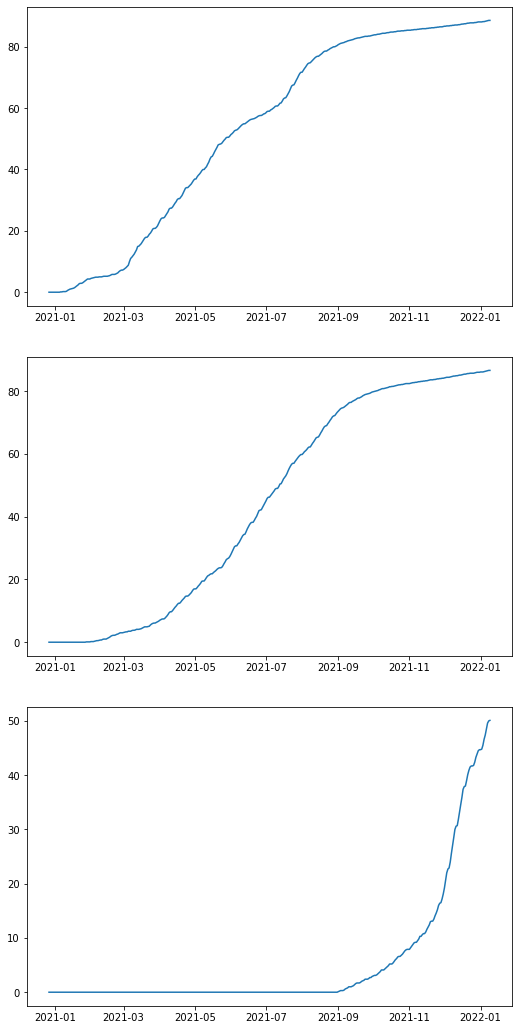

In [23]:
fig, (ax1, ax2, ax3) = plt.subplots(3, 1, figsize=(8, 15))
fig.tight_layout(pad=3)
ax1.plot(df_vac_06['jour'], df_vac_06['couv_dose1'])
ax2.plot(df_vac_06['jour'], df_vac_06['couv_complet'])
ax3.plot(df_vac_06["jour"], df_vac_06["couv_rappel"])



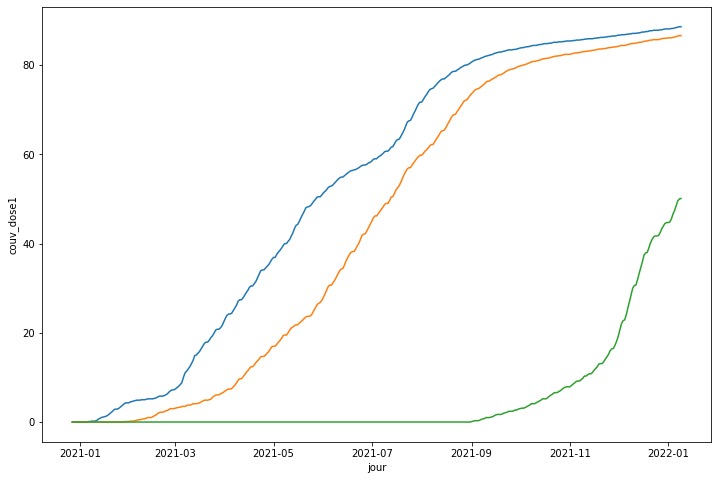

In [24]:
plt.figure(figsize=(12,8))
sns.lineplot(data=df_vac_06,x="jour",y="couv_dose1")
sns.lineplot(data=df_vac_06,x="jour",y="couv_complet")
sns.lineplot(data=df_vac_06,x="jour",y="couv_rappel")
plt.show()

In [138]:
df_vac.shape

(36384, 11)

In [147]:
df_vac.dep.unique()

array(['01', '02', '03', '04', '05', '06', '07', '08', '09', '10', '11',
       '12', '13', '14', '15', '16', '17', '18', '19', '21', '22', '23',
       '24', '25', '26', '27', '28', '29', '2A', '2B', '30', '31', '32',
       '33', '34', '35', '36', '37', '38', '39', '40', '41', '42', '43',
       '44', '45', '46', '47', '48', '49', '50', '51', '52', '53', '54',
       '55', '56', '57', '58', '59', '60', '61', '62', '63', '64', '65',
       '66', '67', '68', '69', '70', '71', '72', '73', '74', '75', '76',
       '77', '78', '79', '80', '81', '82', '83', '84', '85', '86', '87',
       '88', '89', '90', '91', '92', '93', '94', '95'], dtype=object)

In [16]:
vac = (
    Line()
    .add_xaxis(list(df_vac_06["jour"]))
    .add_yaxis(
        "2021",
        list(df_vac_06["n_dose1"]),
        markpoint_opts=opts.MarkPointOpts(
            data=[
                opts.MarkPointItem(type_="max", name="最大值"),
                ### opts.MarkPointItem(type_="min", name="最小值"),
            ]
        ),
    )  
    .set_series_opts(
        ### areastyle_opts=opts.AreaStyleOpts(opacity=0.5),
        label_opts=opts.LabelOpts(is_show=False),
    )
    .set_global_opts(title_opts=opts.TitleOpts(title="Le nombre de vaccination d'Alpes" ,pos_top =0 ),
    legend_opts=opts.LegendOpts(pos_top="5%"),)
)

vac.render_notebook()

In [10]:
df_vac_test_3dep = df_vac[(df_vac.dep == "06") | (df_vac.dep == "59") | (df_vac.dep == "75")]
df_vac_test_3dep.jour = pd.to_datetime(df_vac_test_3dep.jour)

C:\Users\10142260\Anaconda3\lib\site-packages\pandas\core\generic.py:5516: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


In [11]:
df_vac_test_3dep.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1137 entries, 1895 to 28803
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   dep            1137 non-null   object        
 1   jour           1137 non-null   datetime64[ns]
 2   n_dose1        1137 non-null   int64         
 3   n_complet      1137 non-null   int64         
 4   n_rappel       1137 non-null   int64         
 5   n_cum_dose1    1137 non-null   int64         
 6   n_cum_complet  1137 non-null   int64         
 7   n_cum_rappel   1137 non-null   int64         
 8   couv_dose1     1137 non-null   float64       
 9   couv_complet   1137 non-null   float64       
 10  couv_rappel    1137 non-null   float64       
dtypes: datetime64[ns](1), float64(3), int64(6), object(1)
memory usage: 106.6+ KB


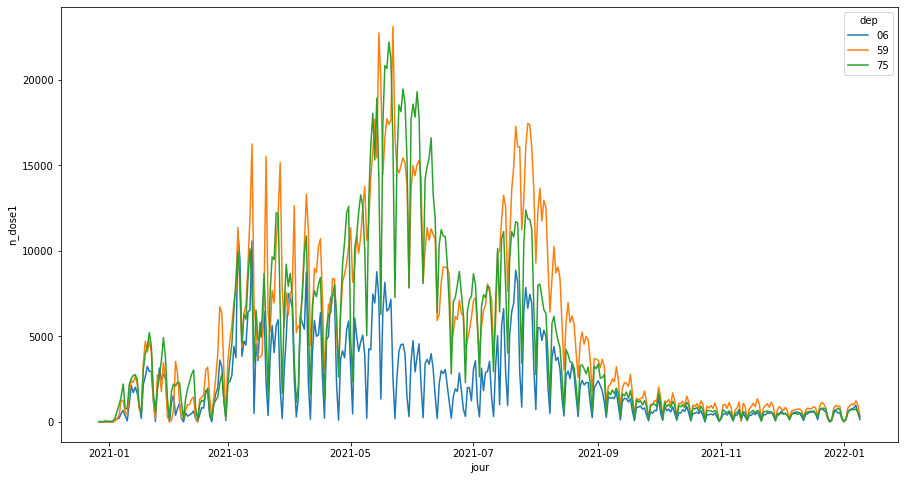

In [20]:
##sns.lineplot(data=df_vac_test_3dep, x='jour',y='n_dose1',hue='dep')
##plt.show()

plt.figure(figsize = (15,8))
sns.lineplot(data = df_vac_test_3dep,
                x = "jour", 
                y = "n_dose1", 
                hue = "dep",
                )
plt.show()

In [12]:
df_vac_pc = pd.read_csv("vacsi-pc-dep-2021-04-02-18h25.csv",sep=";")
df_vac_pc.sample(5)

,dep,jour,pc_vac_dose1,pc_vac_dose2,pc_vac_cum_dose1,pc_vac_cum_dose2
1946,22,2021-02-12,21,24,1328,349
1110,12,2021-03-03,70,11,1274,649
640,07,2021-03-08,24,13,2270,615
304,04,2021-01-16,18,0,119,0
7400,77,2021-03-23,696,16,11202,1743


In [14]:
df_vac_pc.groupby(by = "dep").count().reset_index()

,dep,jour,pc_vac_dose1,pc_vac_dose2,pc_vac_cum_dose1,pc_vac_cum_dose2
0,01,95,95,95,95,95
1,02,95,95,95,95,95
2,03,95,95,95,95,95
3,04,95,95,95,95,95
4,05,95,95,95,95,95
...,...,...,...,...,...,...
98,973,95,95,95,95,95
99,974,95,95,95,95,95
100,976,95,95,95,95,95
101,977,95,95,95,95,95


In [141]:
df_vac["jour"] = pd.to_datetime(df_vac.jour)

In [15]:
dep_count = df_vac.groupby(by="dep").count()